


# Calibración del ángulo real vs. ángulo del encoder

Para corregir la diferencia entre el ángulo medido por el encoder y el ángulo real alcanzado por el brazo (producto de flexión mecánica, holguras, etc.), se ajusta una relación lineal entre ambas mediciones:

[
\theta_\text{real} = a,\theta_\text{enc} + b
]

Donde:

* **(\theta_\text{enc})**: ángulo leído desde el encoder
* **(\theta_\text{real})**: ángulo real medido por el instrumento externo
* **(a)**: error de escala (derivado de flexión, imperfecciones mecánicas o transmisión)
* **(b)**: error de offset (desalineación del cero mecánico)

Esta ecuación permite transformar ángulos deseados en ángulos que el controlador debe pedirle al encoder:

[
\theta_\text{enc,cmd} = \frac{\theta_\text{desired} - b}{a}
]

De esta manera, aunque el encoder no represente perfectamente la posición real, el controlador puede compensarlo utilizando la curva de calibración obtenida experimentalmente.

---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df1 = pd.read_csv('ronda1.csv', sep=';', decimal=',')
df2 = pd.read_csv('ronda2.csv', sep=';', decimal=',')
df3 = pd.read_csv('ronda3.csv', sep=';', decimal=',')


real_m1 =  df1["Angulo real"].to_numpy()
real_m2 =  df2["Angulo real"].to_numpy()
real_m3 =  df3["Angulo real"].to_numpy()

encoder_m1 = df1["Encoder"].to_numpy() + min(real_m1)
encoder_m2 = df2["Encoder"].to_numpy() + min(real_m2)
encoder_m3 = df3["Encoder"].to_numpy() + min(real_m3)



encoder_all = np.concatenate((encoder_m1, encoder_m2, encoder_m3))
real_all = np.concatenate((real_m1, real_m2, real_m3))

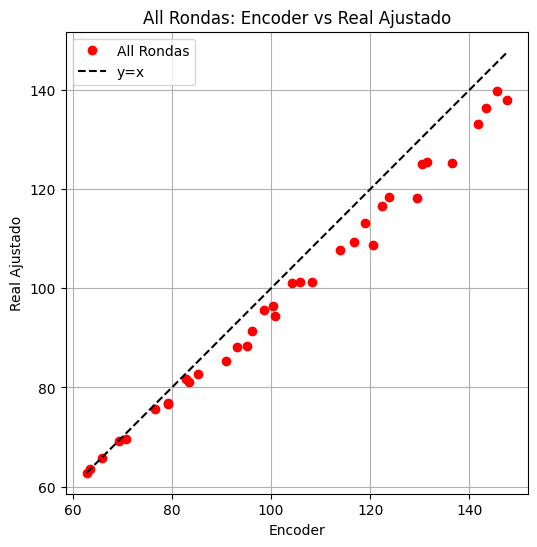

In [25]:
plt.figure(figsize=(6, 6))

# Plot for all data
plt.plot(encoder_all, real_all, 'o', color='red', label='All Rondas')

# Add y=x line
x_range = np.array([encoder_all.min(), encoder_all.max()])
plt.plot(x_range, x_range, 'k--', label='y=x')

plt.title('All Rondas: Encoder vs Real Ajustado')
plt.xlabel('Encoder')
plt.ylabel('Real Ajustado')
plt.legend()
plt.grid(True)

# Set aspect ratio to 1:1
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [26]:
a, b = np.polyfit(encoder_all, real_all, 1)
print("a (slope)     =", a)
print("b (intercept) =", b)

a (slope)     = 0.8934935786189117
b (intercept) = 6.210560074339878


In [27]:
pred = a*encoder_all + b
residuals = real_all - pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((real_all - np.mean(real_all))**2)
r2 = 1 - ss_res/ss_tot
print("R^2 =", r2)

R^2 = 0.9938973222074635


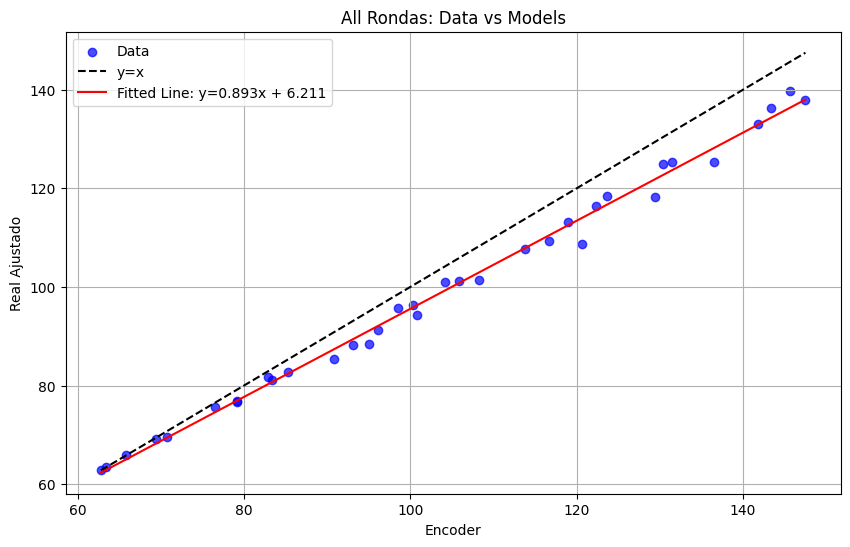

In [28]:
plt.figure(figsize=(10, 6))

# 1. Plot the concatenated data
plt.scatter(encoder_all, real_all, label='Data', color='blue', alpha=0.7)

# Define the range for the lines based on the data
x_range = np.array([encoder_all.min(), encoder_all.max()])

# 2. Plot the y=x line
plt.plot(x_range, x_range, 'k--', label='y=x')

# 3. Plot the fitted line using a and b
plt.plot(x_range, a * x_range + b, 'r-', label=f'Fitted Line: y={a:.3f}x + {b:.3f}')

plt.title('All Rondas: Data vs Models')
plt.xlabel('Encoder')
plt.ylabel('Real Ajustado')
plt.legend()
plt.grid(True)
plt.show()